# NoShowAppointments-kagglev

I have selected [NoShowAppointment](https://www.kaggle.com/joniarroba/noshowappointments/home) data, which have collected patient's details. Data has the scheduledDay, appointmentDay, Gender, Age, other related including ***NoShow***. Here, ***NoShow*** tells that patient came on scheduledDay or not.

I am going to do analysis to find out ***what would be various reasons for missing their scheduledDay***



***1) Reading data from csv files***

In [1]:
# importing libraries  

import unicodecsv
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns


In [2]:
#reading csv file using pandas
noshow_appointments = pds.read_csv('C:/Users/Administrator/ML/Project/noshowappointments_kaggle.csv')

#print first 5 rows from tables
print(noshow_appointments.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
len(noshow_appointments)

110527

In [4]:
noshow_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
noshow_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
print(noshow_appointments.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


***2) Correcting typo mistake in column name, so it shows a consistancy in name format***

In [7]:
noshow_appointments.rename(columns = {'AppointmentID' : 'AppointmentId','Hipertension' : 'Hypertension','Alcoholism':'Alchoholism', 'Handcap': 'Handicap', 'No-show' : 'No_show'}, inplace = True)

In [8]:
print(noshow_appointments.columns)

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alchoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


**3) Correcting data-type of values**

 Date and time are mix together and it looks so messy


In [9]:
print(noshow_appointments.ScheduledDay.head())
print(noshow_appointments.AppointmentDay.head())

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object
0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


***3.1) For convenience, I am going to convert the ScheduledDay and AppointmentDay columns into datetime64 format***

In [10]:
noshow_appointments.ScheduledDay = noshow_appointments.ScheduledDay.apply(np.datetime64)
noshow_appointments.AppointmentDay = noshow_appointments.AppointmentDay.apply(np.datetime64)


print(noshow_appointments.ScheduledDay.head())
print(noshow_appointments.AppointmentDay.head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


**3.2) Number of waiting days**


In [11]:
#writing a function to get date object
def converting_date_format(file):
    date_format = file.date()
    return date_format

#converting all data in each row of 'ScheduledDay' and 'AppointmentDay' 
noshow_appointments['Scheduled_Date'] = noshow_appointments['ScheduledDay'].apply(converting_date_format)
noshow_appointments['Appointment_Date'] = noshow_appointments['AppointmentDay'].apply(converting_date_format)

In [12]:
noshow_appointments['NumberWaitingDays'] = noshow_appointments['Appointment_Date'] - noshow_appointments['Scheduled_Date']

In [13]:
#Converting timedelta type to int type

noshow_appointments.NumberWaitingDays = (noshow_appointments.NumberWaitingDays / np.timedelta64(1, 'D')).astype(int)

**3.3) Schedued Day and Month**

adding a colmun for scheduled day and month

In [14]:
from datetime import datetime

#function to get weekday and month of scheduled day

def get_day_name(datefile):
    date_trip = datefile.date()
    day = date_trip.strftime("%a")
    return day

def get_month_name(datefile):
    date_trip = datefile.date()
    month = date_trip.strftime("%b")
    return month

In [15]:
noshow_appointments['Scheduled_Day_Name'] = noshow_appointments.ScheduledDay.apply(get_day_name)
noshow_appointments['Scheduled_Month_Name'] = noshow_appointments.ScheduledDay.apply(get_month_name)

We also create a new feature called HourOfTheDay, which will indicate the hour of the day at which the appointment was booked. 

In [16]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

noshow_appointments['HourOfTheDay'] = noshow_appointments.ScheduledDay.apply(calculateHour)

**Reviewing data for erroneous values and NaNs**

check for any erroneous values and NaNs in data.

In [17]:
print('Age:',sorted(noshow_appointments.Age.unique()))
print('Gender:',noshow_appointments.Gender.unique())
print('Diabetes:',noshow_appointments.Diabetes.unique())
print('Alchoholism:',noshow_appointments.Alchoholism.unique())
print('Hypertension:',noshow_appointments.Hypertension.unique())
print('Handicap:',noshow_appointments.Handicap.unique())
print('Scholarship:',noshow_appointments.Scholarship.unique())
print('SMS_received:',noshow_appointments.SMS_received.unique())
print('NumberWaitingDays: ',noshow_appointments.NumberWaitingDays.unique())
print('Scheduled_Day_Name: ',noshow_appointments.Scheduled_Day_Name.unique())
print('Scheduled_Month_Name: ',noshow_appointments.Scheduled_Month_Name.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
NumberWaitingDays:  [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 1

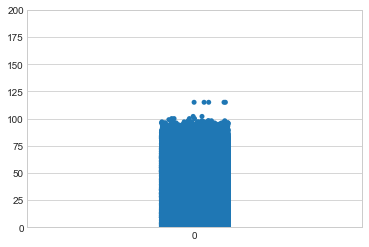

In [18]:
sns.stripplot(data = noshow_appointments.Age, jitter = True)
plt.ylim(0, 200)
plt.show()

We can see some impossible age as -1 and extra ordinary age which are greater than 100. Age which have value greater than 100 that appear very rare case. So I am going to exclude from data. So I will treat the ages greater than 95 as outliers.

In [19]:
noshow_appointments = noshow_appointments[(noshow_appointments.Age >= 0) & (noshow_appointments.Age <= 95)]

In [20]:
noshow_appointments.Age.unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 92, 93, 95], dtype=int64)

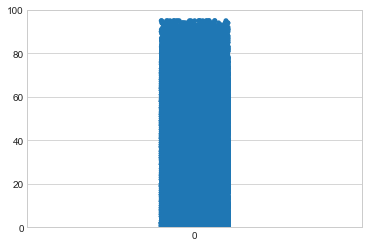

In [21]:
sns.stripplot(data = noshow_appointments.Age, jitter = True)
plt.ylim(0, 100)
plt.show()

**Checking for outliers in AwaitingTime**

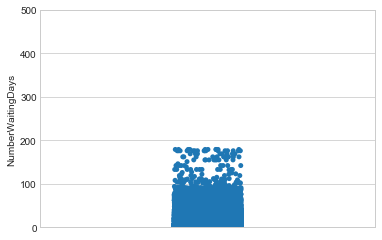

In [22]:
#noshow_appointments['NumberWaitingDays'] = noshow_appointments.index
sns.stripplot(data = noshow_appointments, y = 'NumberWaitingDays', jitter = True)
plt.ylim(0, 500)
plt.show()

#type(noshow_appointments.NumberWaitingDays[0])

looK liKe waiting_days is not having outlier. Good to go

**Checing value of No_show column**

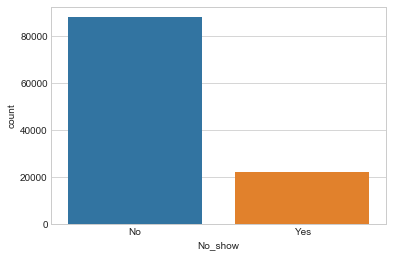

In [23]:
target = sns.countplot(x="No_show", data=noshow_appointments)

According above diagram, 'No' column tells that number of people have shown on appointment date and 'Yes' column tells about number of people have not show on appointment date. These columns are creating confusions. 

In [24]:
#adding a new column as 'Noshow' and adding 0 value inplace of 'No' and 1 value inplace of 'Yes'
noshow_appointments['Noshow'] = [0 if i == "No" else 1 for i in noshow_appointments['No_show']]

***4) Data Investigation***

**4.1) investigation based on Age **

**4.1.1) Age below 18 **

In this analysis, i assuming that since 18 is the minimum age for responsibility, then the child is still a teenager and not yet responsible for this actions looking at from the economic perspective.

In [25]:
teens_start_age = 18 
teenagers = noshow_appointments[noshow_appointments.Age < teens_start_age]    # no of people below the age of 18

print ("Here is the number of people below the age of 18 : " + str(len(teenagers)))

Here is the number of people below the age of 18 : 27379


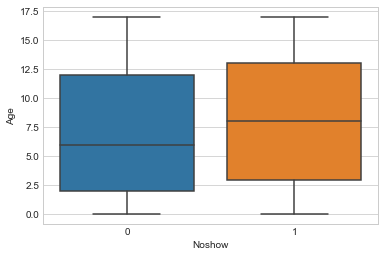

In [28]:
age_hist = sns.boxplot(x="Noshow", y="Age", data=teenagers)

**4.1.2)  Age range from 18 to 40**

people in this range are responsible and they can take care of themselves by law.
a variable was created 40, i am using this as a max for people to have settled down

In [30]:
settled_down_age = 40   # to ask my mentor if i have to turn this into a function.
settling_down = noshow_appointments[(noshow_appointments['Age'] >= teens_start_age) & (noshow_appointments['Age'] <= settled_down_age)]

print ("This is the number of people from 18 to 40 of the data set : " + str(len(settling_down)))

This is the number of people from 18 to 40 of the data set : 33304


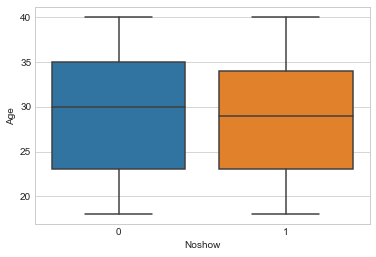

In [31]:
age_hist = sns.boxplot(x="Noshow", y="Age", data=settling_down)

I want to see how many people went for appointment or not in this category

**4.1.3) Age range from 40 to 60**


In [47]:
old_age = 60   # to ask my mentor if i have to turn this into a function.
old_age_data = noshow_appointments[(noshow_appointments['Age'] > settled_down_age) & (noshow_appointments['Age'] <= old_age)]

print ("This is the number of people from 40 to 60 of the data set : " + str(len(old_age_data)))

This is the number of people from 40 to 60 of the data set : 30081


**4.1.3) Age range from 60 to 95**


In [49]:
retired_old_age = 95   # to ask my mentor if i have to turn this into a function.
retired_old_age_data = noshow_appointments[(noshow_appointments['Age'] > old_age) & (noshow_appointments['Age'] <= retired_old_age)]

print ("This is the number of people from 40 to 60 of the data set : " + str(len(retired_old_age_data)))
retired_old_age_data.head()

This is the number of people from 40 to 60 of the data set : 19716


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMS_received,No_show,Scheduled_Date,Appointment_Date,NumberWaitingDays,Scheduled_Day_Name,Scheduled_Month_Name,HourOfTheDay,noshow,Noshow
0,2.990000e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,No,2016-04-29,2016-04-29,0,Fri,Apr,19,0,0
2,4.260000e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,No,2016-04-29,2016-04-29,0,Fri,Apr,16,0,0
5,9.600000e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,...,0,No,2016-04-27,2016-04-29,2,Wed,Apr,9,0,0
24,8.730000e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,...,0,No,2016-04-29,2016-04-29,0,Fri,Apr,14,0,0
32,5.290000e+13,5637908,M,2016-04-29 07:30:27,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,...,0,No,2016-04-29,2016-04-29,0,Fri,Apr,8,0,0


**Removing rows which have age less than 0**

In [40]:
#removing rows which have age less than 0
noshow_appointments = noshow_appointments[noshow_appointments.Age > 0]

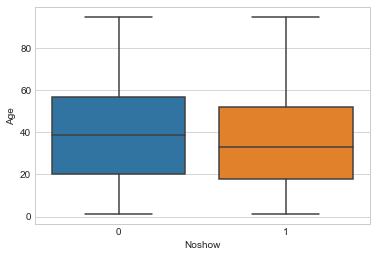

In [41]:
age_hist = sns.boxplot(x="Noshow", y="Age", data=noshow_appointments)

Noshow
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

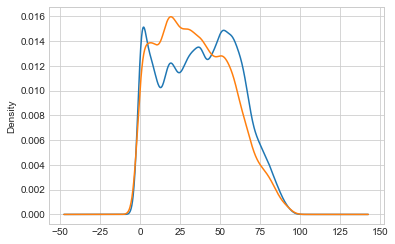

In [32]:
noshow_appointments.groupby('Noshow').Age.plot(kind='kde')

In [38]:
#dividing age into 5 categories(0-20, 20-40, 40-60, 60-80, 80-100)
noshow_appointments['Age_Category'] = pds.qcut(noshow_appointments['Age'], 5, labels=False)

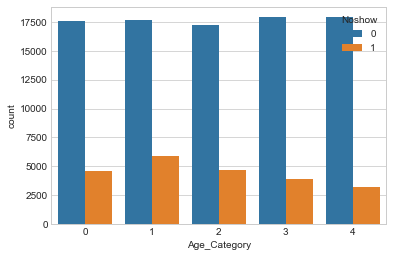

In [39]:
sns.countplot(x="Age_Category", hue = "Noshow", data=noshow_appointments)

According to diagram, Younger people (age < 48 years) are better at showing up on scheduled days but trend reverses after age of 48 years. One of the reasons to categorize this variable.

**4.2) Schedules and Appointment dates**


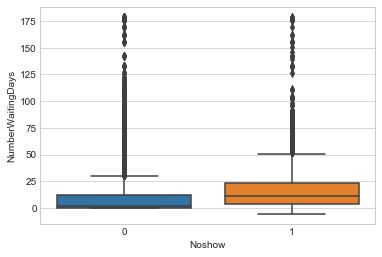

In [41]:
sns.boxplot(x="Noshow", y="NumberWaitingDays", data=noshow_appointments)

Clearly, people who are missing appoints have larger gap between the scheduled day and appointment day.

In [42]:
noshow_appointments['WaitingDays_cat'] = [1 if i < 1 else i for i in noshow_appointments['NumberWaitingDays']]
noshow_appointments['WaitingDays_cat'] = [2 if i > 1 and i <= 7 else i for i in noshow_appointments['WaitingDays_cat']]
noshow_appointments['WaitingDays_cat'] = [3 if i > 7 and i <= 30 else i for i in noshow_appointments['WaitingDays_cat']]
noshow_appointments['WaitingDays_cat'] = [4 if i > 30 else i for i in noshow_appointments['WaitingDays_cat']]

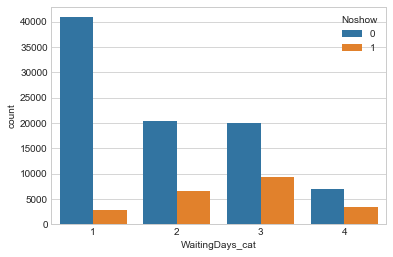

In [43]:
sns.countplot(x="WaitingDays_cat", hue = "Noshow", data=noshow_appointments)

Higher the time between the appointment, higher the probability of missing appointment.

In [44]:
noshow_appointments.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,No_show,Scheduled_Date,Appointment_Date,NumberWaitingDays,Scheduled_Day_Name,Scheduled_Month_Name,HourOfTheDay,Noshow,Age_Category,WaitingDays_cat
0,2.990000e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,No,2016-04-29,2016-04-29,0,Fri,Apr,19,0,4,1
1,5.590000e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,No,2016-04-29,2016-04-29,0,Fri,Apr,16,0,3,1
2,4.260000e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,No,2016-04-29,2016-04-29,0,Fri,Apr,16,0,4,1
3,8.680000e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,No,2016-04-29,2016-04-29,0,Fri,Apr,17,0,0,1
4,8.840000e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,No,2016-04-29,2016-04-29,0,Fri,Apr,16,0,3,1


**weekday**

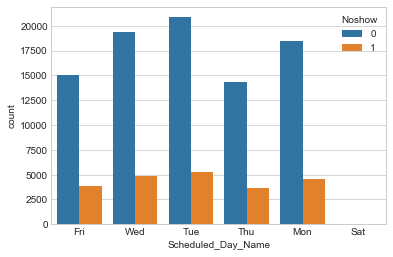

In [45]:
sns.countplot(x="Scheduled_Day_Name", hue = "Noshow", data=noshow_appointments)

It's not clear according this table. there is no reason 

**Monthwise**

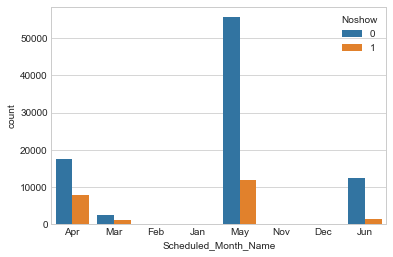

In [46]:
sns.countplot(x="Scheduled_Month_Name", hue = "Noshow", data=noshow_appointments)

Accroding to table, May month has more number of appointment booking date and no_show also.

**Hours**

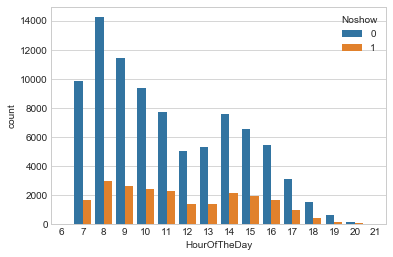

In [48]:
sns.countplot(x="HourOfTheDay", hue = "Noshow", data=noshow_appointments)

According to above diagram, patients has missed the appoitment when they had more time between the day when the appointment was scheduled and actual appointment time.

**4.3) Gender**


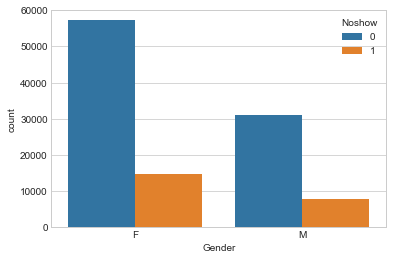

In [51]:
sns.countplot(x="Gender", hue = "Noshow", data=noshow_appointments)

As compare to male, female are more concern about health and they have more number of appointment date. But also female has large number of missing appointments date.

**4.4) Area**

Text(0,0.5,'Number of patients ')

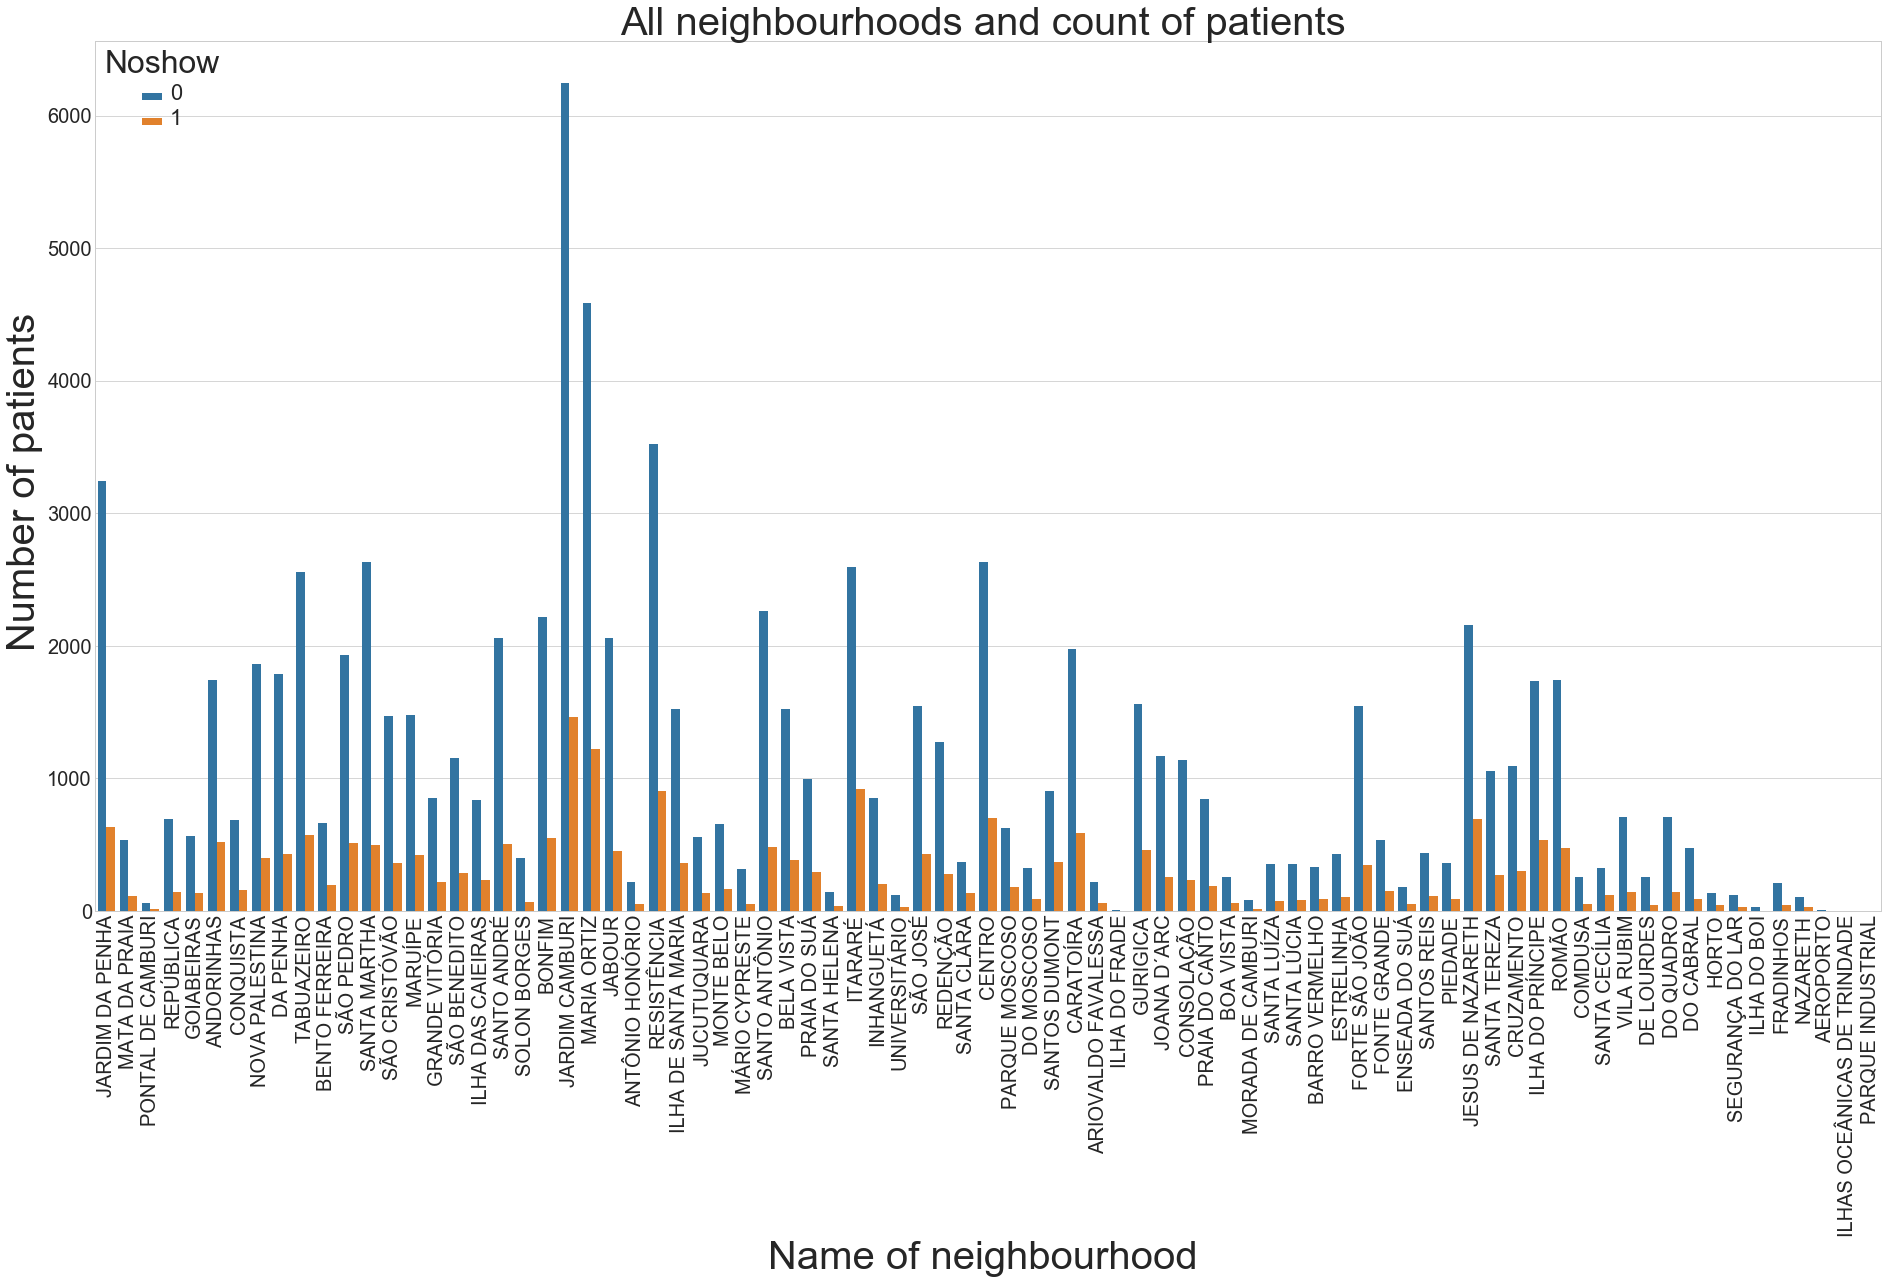

In [64]:
# Lets analyse the location of hospital
# In the figure it is observed that No show is almost in the same proportion in all neighbourhood, but it can be seen that count is exorbitant in two of the location and they are
# Jardim camburi and Maria Ortiz
location=noshow_appointments.groupby(['Neighbourhood'], sort=True).size()
fig, ax = plt.subplots()
fig.set_size_inches(32, 16)
sns.countplot(x='Neighbourhood',data=noshow_appointments, hue='Noshow')
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.title("All neighbourhoods and count of patients ",fontsize=40)
plt.setp(ax.get_legend().get_texts(), fontsize='22') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.xlabel("Name of neighbourhood ",fontsize=40)
plt.ylabel("Number of patients ",fontsize=40)

According the above table, 'JARDIM CAMBURI' has largest missed appointments as compare to other.